In [425]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from matplotlib import pyplot

PROBLEM 1

In [426]:
sqlite_file = 'lahman2014.sqlite'
conn = sqlite3.connect(sqlite_file)
#the total payroll
salary_query = "SELECT teamID, yearID, sum(salary) as total_payroll FROM Salaries GROUP BY teamID, yearID ORDER BY teamID, yearID"
team_salaries = pd.read_sql(salary_query, conn)
#winning percentage
team_query = "SELECT teamID, yearID, W as number_of_wins, W as number_of_games, (W*100.0/G) as win_percentage FROM teams GROUP BY teamID, yearID ORDER BY teamID, yearID"
win_percentage = pd.read_sql(team_query, conn)
#merge them into one SQL table
data = team_salaries.merge(win_percentage, how = "inner", left_on = ["teamID", "yearID"], right_on = ["teamID", "yearID"])
data

,teamID,yearID,total_payroll,number_of_wins,number_of_games,win_percentage
0,ANA,1997,31135472.0,84,84,51.851852
1,ANA,1998,41281000.0,85,85,52.469136
2,ANA,1999,55388166.0,70,70,43.209877
3,ANA,2000,51464167.0,82,82,50.617284
4,ANA,2001,47535167.0,75,75,46.296296
5,ANA,2002,61721667.0,99,99,61.111111
6,ANA,2003,79031667.0,77,77,47.530864
7,ANA,2004,100534667.0,92,92,56.790123
8,ARI,1998,32347000.0,65,65,40.123457
9,ARI,1999,68703999.0,100,100,61.728395


PROBLEM 2

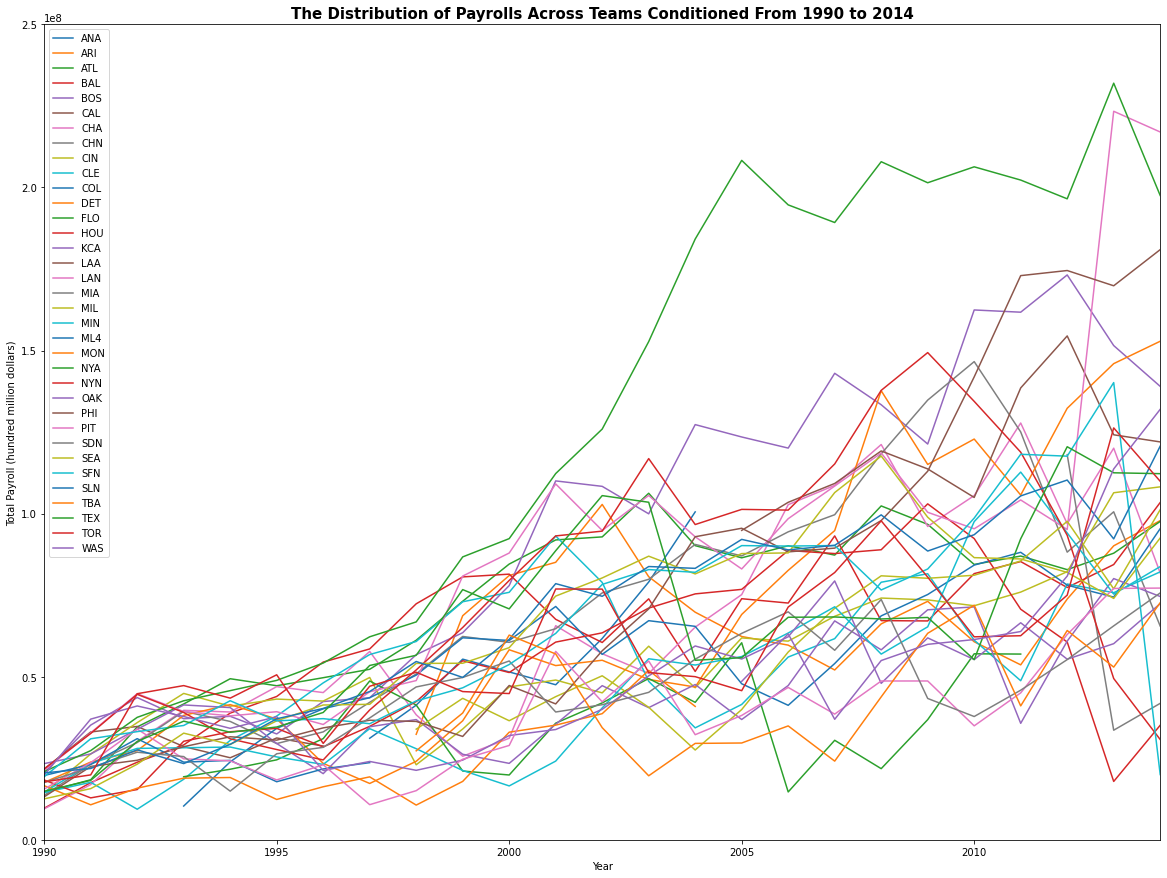

In [427]:
#get the data from 1990 to 2014
new_data = data[(data['yearID'] >= 1990) & (data['yearID'] <= 2014)]
#x-axis and y-axis
plt.figure(figsize = (20, 15))
plt.xlim((1990, 2014))
plt.ylim((0, 250000000))
plt.title("The Distribution of Payrolls Across Teams Conditioned From 1990 to 2014", size=15, weight = "bold")
plt.xlabel("Year")
plt.ylabel("Total Payroll (hundred million dollars)")
#get the data we want (teamID, yearID and payroll) from the table
teamID_list = new_data['teamID'].to_list()
yearID_list = new_data['yearID'].to_list()
payroll_list = new_data['total_payroll'].to_list()
#convert list to dictionary
def Convert(lst):
    res_dct = {i: lst.count(i) for i in set(lst)}
    return res_dct
#plot
new_teamID_list = Convert(teamID_list)
sorted_teamID_list = sorted(new_teamID_list.keys(), key = lambda x: x.lower())
for team in sorted_teamID_list:
    index = new_teamID_list[team]
    pay = payroll_list[0:index]
    year = yearID_list[0:index]
    plt.plot(year, pay, label = str(team))
    payroll_list = payroll_list[index:]
    yearID_list = yearID_list[index:]
plt.legend()
plt.show() 

QUETSION 1

The general trend of payroll is increasing from 1990 to 2014 for all teams, and the payroll gap between different teams becomes bigger.

PROBLEM 3

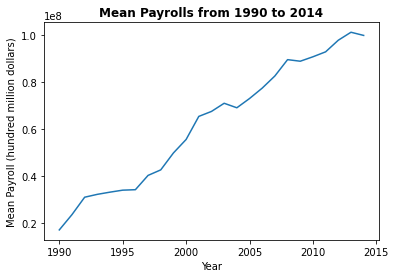

In [428]:
#calculate the mean payroll
mean_table = new_data[['yearID','total_payroll']]
mean_payroll = (mean_table.groupby('yearID')).mean()
#plot
plt.title("Mean Payrolls from 1990 to 2014", weight = "bold")
plt.xlabel("Year")
plt.ylabel("Mean Payroll (hundred million dollars)")
plt.plot(mean_payroll)
plt.show()

RPOBLEM 4

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


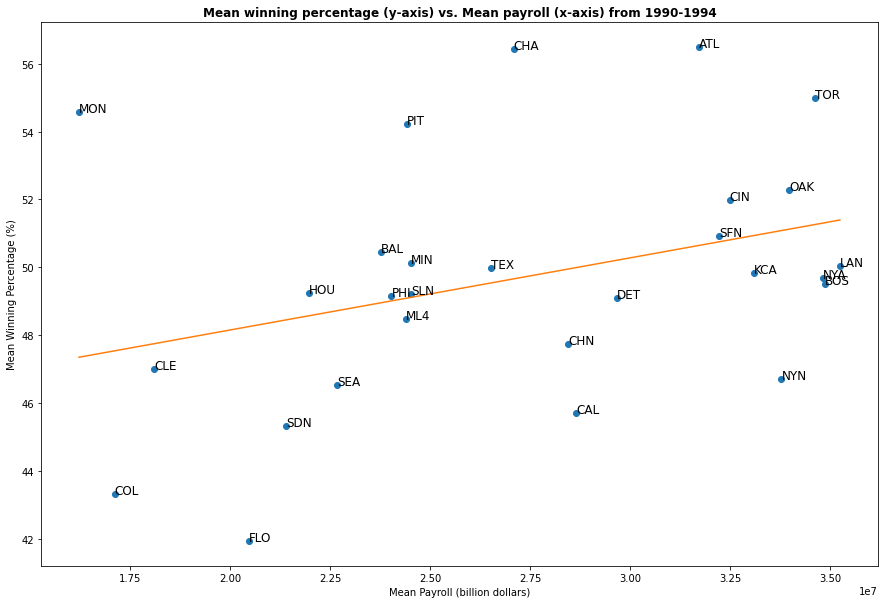

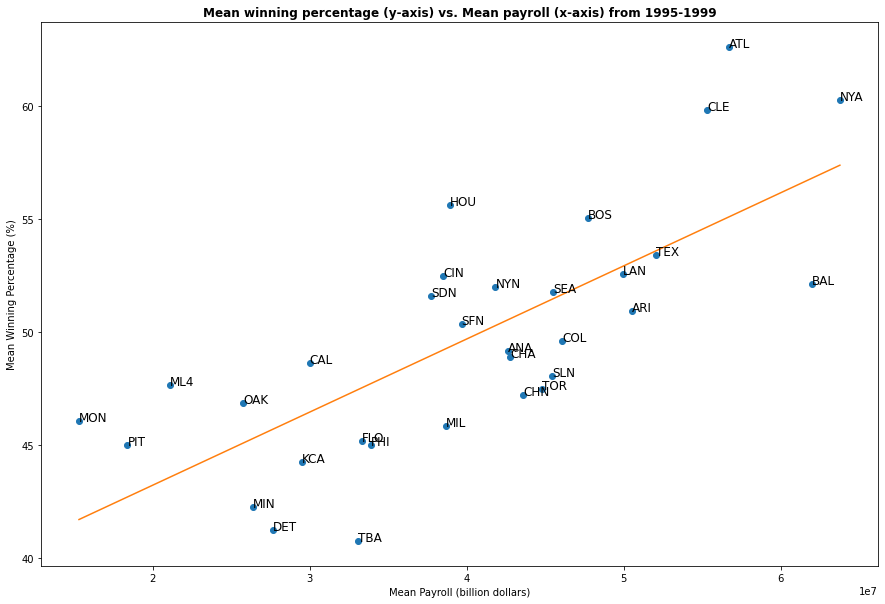

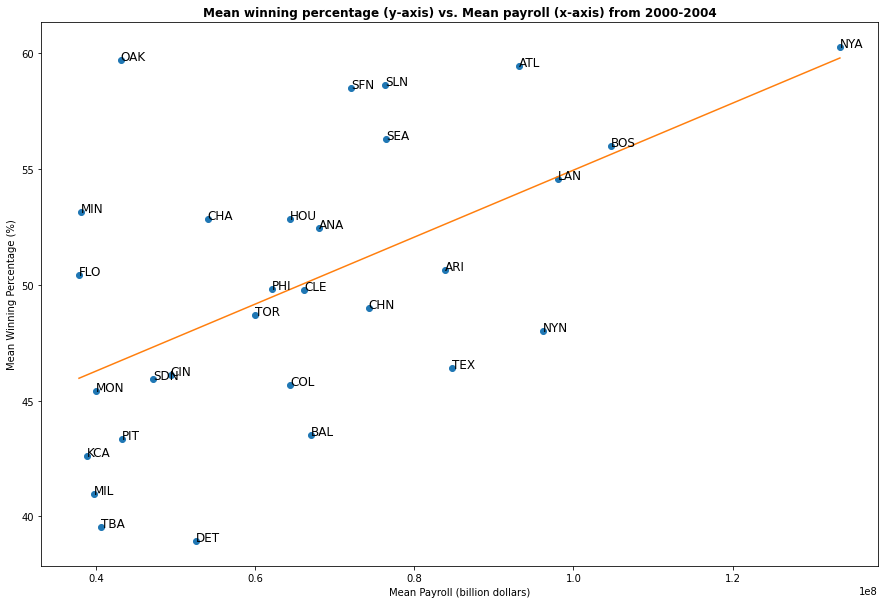

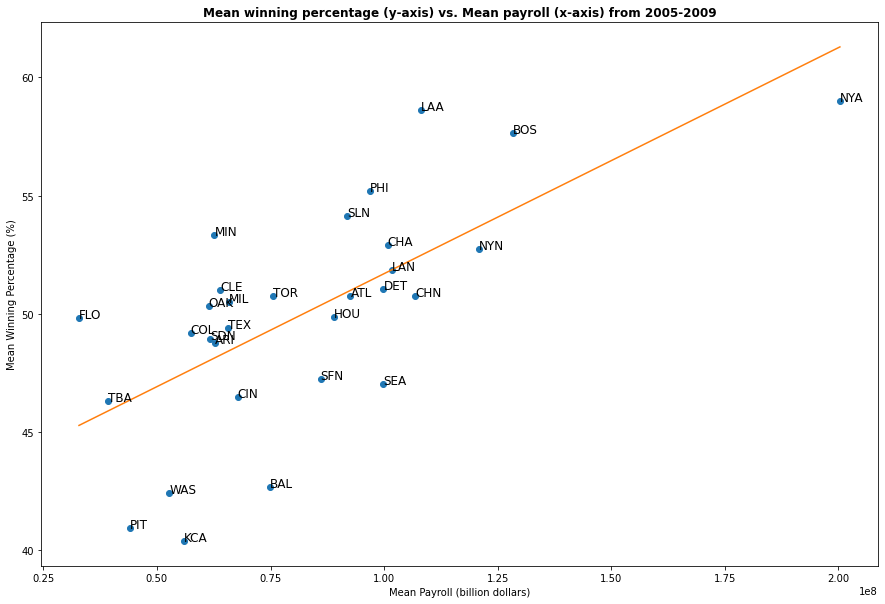

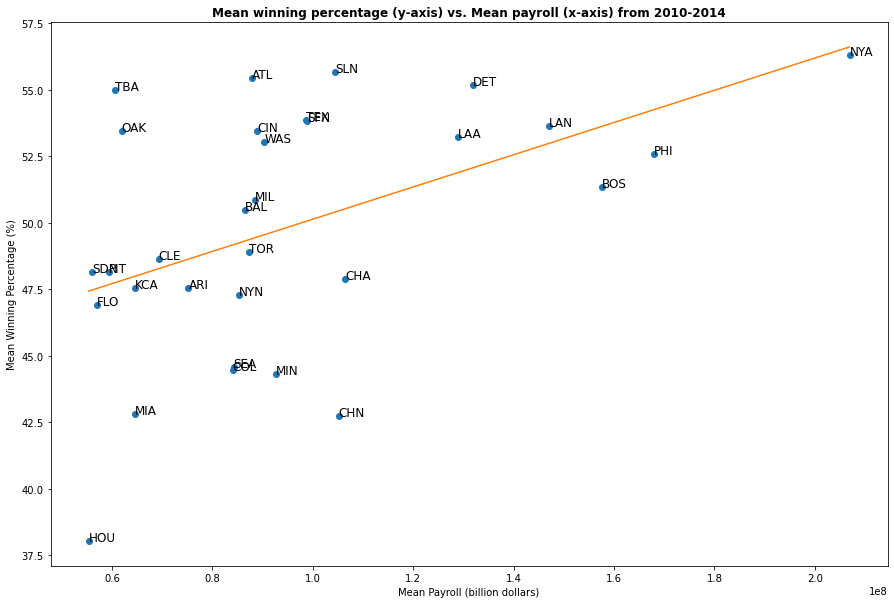

In [429]:
#discretize year into five time periods
temp = new_data[['yearID','teamID','total_payroll','win_percentage']]
periods = ["1990-1994", "1995-1999", "2000-2004", "2005-2009", "2010-2014"]
temp['time_period'] = pd.cut(temp['yearID'], right = False, bins = 5, labels = periods)
#find mean_payroll and mean_win_percentage
for p in periods: 
    table = temp.drop(temp[p != temp['time_period']].index)
    mean_payroll = (table.groupby(['teamID']))['total_payroll'].mean()
    mean_win = (table.groupby(['teamID']))['win_percentage'].mean()
#plot
    z = np.polyfit(x = mean_payroll, y = mean_win, deg = 1)
    f = np.poly1d(z)
    x_new = np.linspace(mean_payroll.min(), mean_payroll.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(15,10))
    plt.plot(mean_payroll, mean_win,'o', x_new, y_new)   
    for i, txt in enumerate(mean_payroll.index):
        plt.annotate(txt, (mean_payroll[i], mean_win[i]), size = 12)  
    plt.title("Mean winning percentage (y-axis) vs. Mean payroll (x-axis) from " + p, weight = "bold")
    plt.xlabel("Mean Payroll (billion dollars)")
    plt.ylabel("Mean Winning Percentage (%)")
    plt.show()

QUESTION 2

In general, the more payroll is, the more winning percentage is. The team NYA and BOS are being particularly good at paying for wins across these time periods. For the team OAK, the team's winning percentage is above the average level while the payroll is not that high, which means the spending efficiency is high.

PROBLEM 5

In [430]:
standardTable = new_data
for year, year_df in standardTable.groupby('yearID'):
    #the standard deviation
    sd = year_df['total_payroll'].std() 
    #the average
    avg = year_df['total_payroll'].mean()
    for team, team_df in year_df.groupby('teamID'):
        #the standard payroll
        standardTable.loc[(standardTable['yearID'] == year) & (standardTable['teamID'] == team),'standard_payroll'] = (team_df['total_payroll'] - avg) / sd
standardTable = standardTable[['yearID', 'teamID', 'total_payroll', 'standard_payroll']]
standardTable

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1681: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = empty_value
/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,yearID,teamID,total_payroll,standard_payroll
0,1997,ANA,31135472.0,-0.698639
1,1998,ANA,41281000.0,-0.086369
2,1999,ANA,55388166.0,0.271410
3,2000,ANA,51464167.0,-0.190214
4,2001,ANA,47535167.0,-0.721244
5,2002,ANA,61721667.0,-0.232769
6,2003,ANA,79031667.0,0.288791
7,2004,ANA,100534667.0,0.960040
8,1998,ARI,32347000.0,-0.667223
9,1999,ARI,68703999.0,0.919025


PROBLEM 6

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


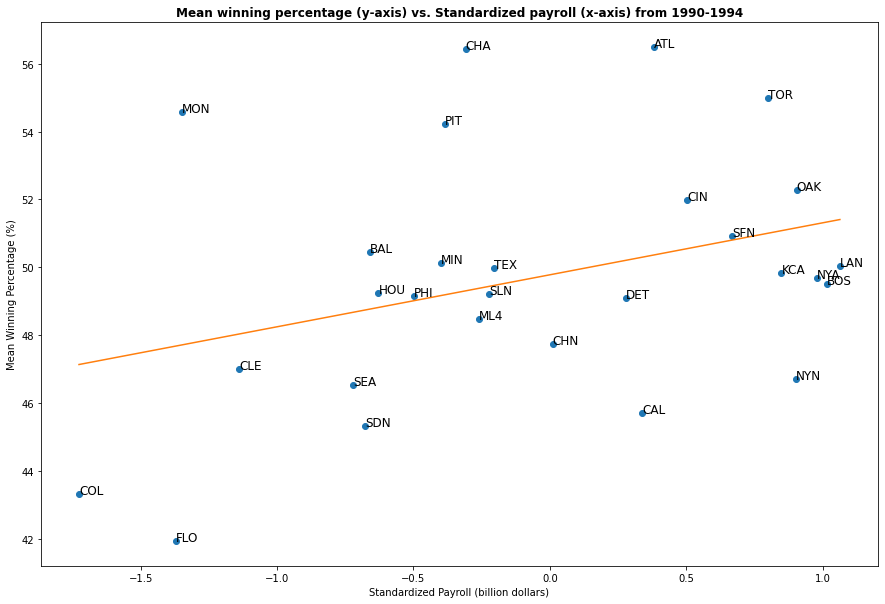

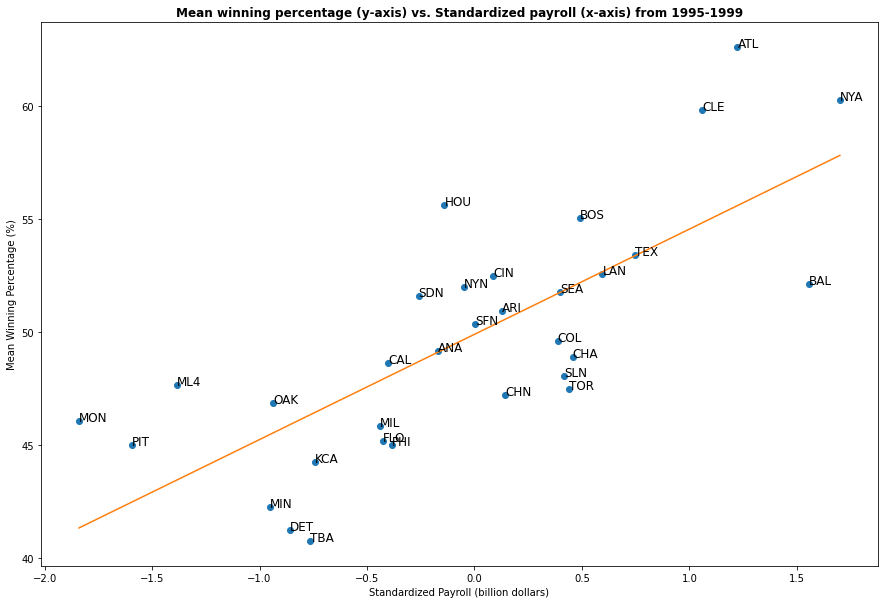

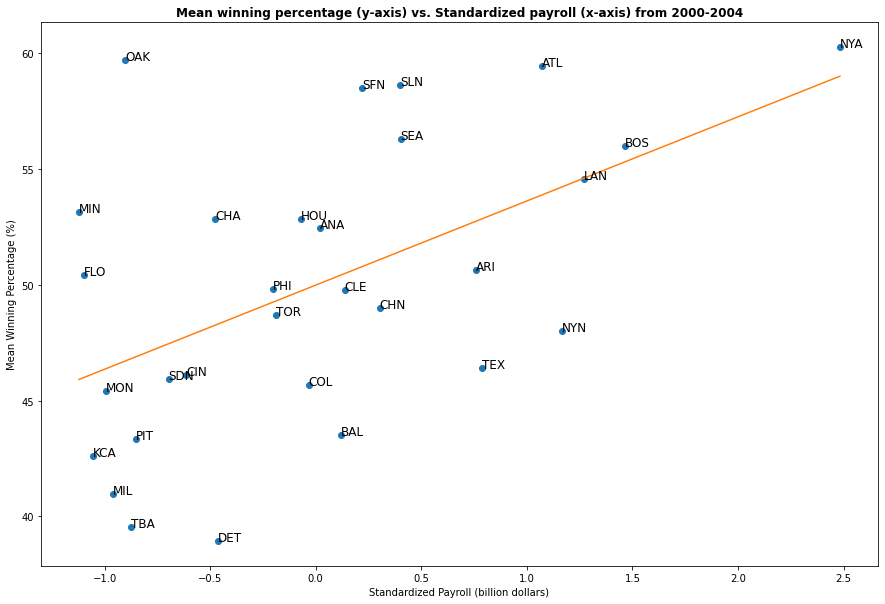

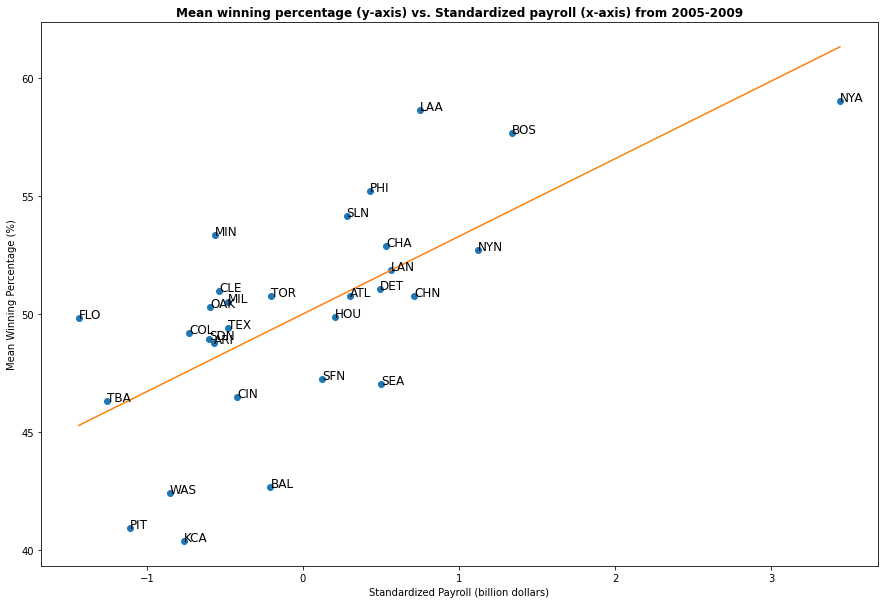

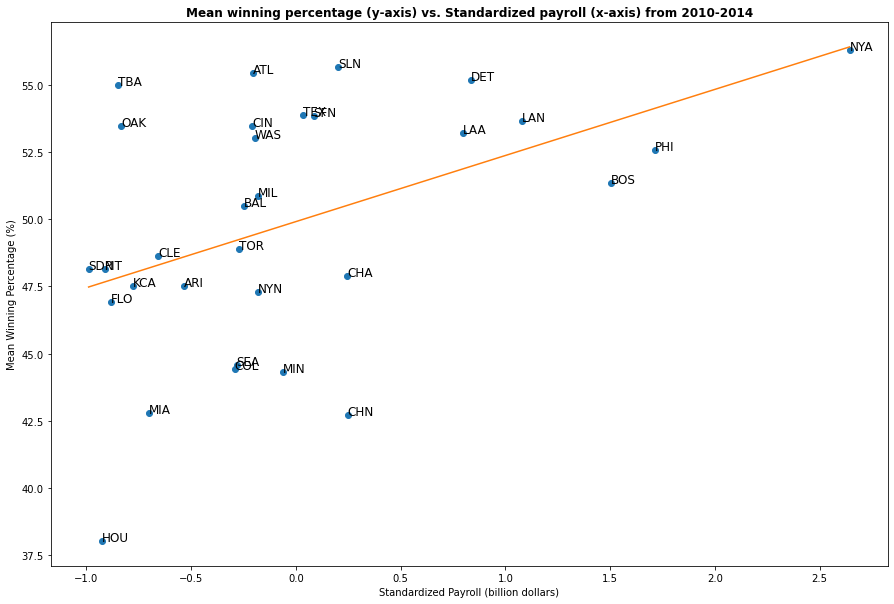

In [431]:
temp['standard_payroll'] = standardTable['standard_payroll'].values
#find mean_payroll and mean_win_percentage
for p in periods: 
    table = temp.drop(temp[p != temp['time_period']].index)
    mean_std = (table.groupby(['teamID']))['standard_payroll'].mean()
    mean_win = (table.groupby(['teamID']))['win_percentage'].mean()
#plot
    z = np.polyfit(x = mean_std, y = mean_win, deg = 1)
    f = np.poly1d(z)
    x_new = np.linspace(mean_std.min(), mean_std.max(), 100)
    y_new = f(x_new)
    plt.figure(figsize=(15,10))
    plt.plot(mean_std, mean_win,'o', x_new, y_new)   
    for i, txt in enumerate(mean_std.index):
        plt.annotate(txt, (mean_std[i], mean_win[i]), size = 12)  
    plt.title("Mean winning percentage (y-axis) vs. Standardized payroll (x-axis) from " + p, weight = "bold")
    plt.xlabel("Standardized Payroll (billion dollars)")
    plt.ylabel("Mean Winning Percentage (%)")
    plt.show()

QUESTION 3

The main trend is the same for the problem 4 and problem 6, and the scatter of the data are similar. The advantage of the problem 4 is we can know the relationship between the mean, and the advantafe of the problem 6 is we can know the relationship between the standard deviation.

PROBLEM 7

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


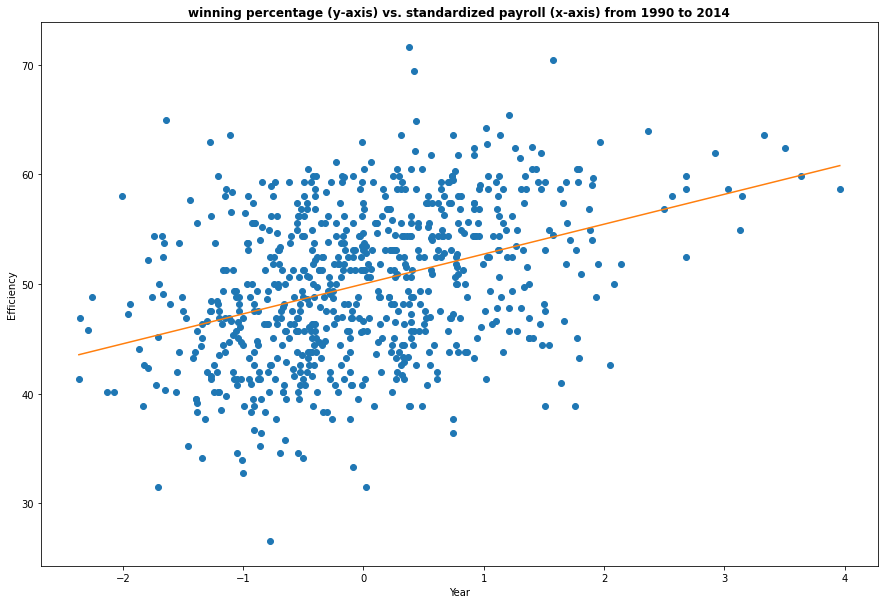

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [432]:
relation = new_data[['yearID','teamID','total_payroll','win_percentage']]
relation['standard_payroll'] = standardTable['standard_payroll']
#plot
x_data = relation['standard_payroll'].values
y_data = relation['win_percentage'].values
z = np.polyfit(x = x_data, y = y_data, deg = 1)
f = np.poly1d(z)
x_new = np.linspace(x_data.min(), x_data.max(), 100)
y_new = f(x_new)
plt.figure(figsize=(15,10))
plt.plot(x_data, y_data,'o',x_new,y_new)
plt.title("winning percentage (y-axis) vs. standardized payroll (x-axis) from 1990 to 2014", weight='bold')
plt.xlabel("Year")
plt.ylabel("Efficiency")
plt.show()
#the the expected win percentage with given formula
relation['expected_win_percentage']  = relation['standard_payroll'] * 2.5 + 50

PROBLEM 8

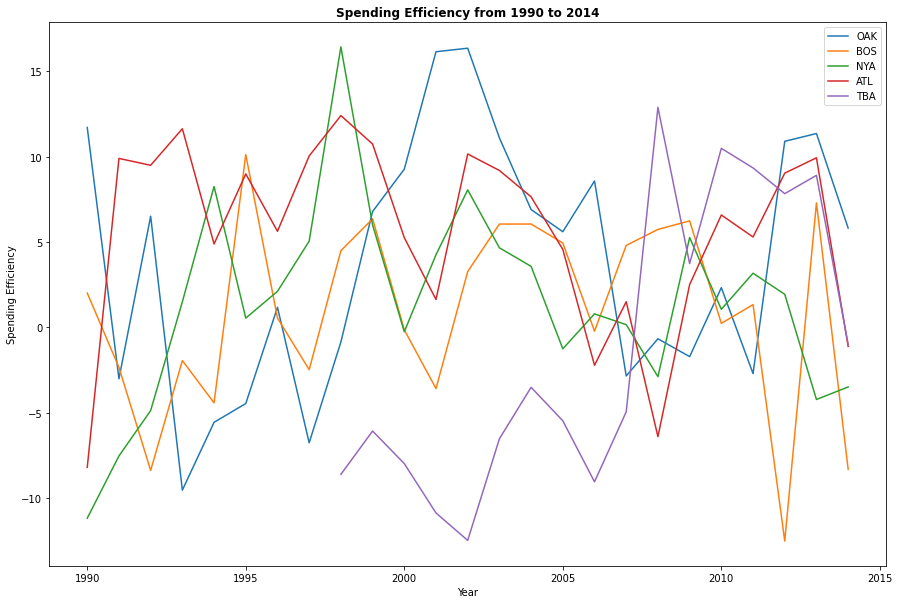

In [433]:
relation['spending_efficiency'] = relation['win_percentage'] - relation['expected_win_percentage']
efficiency_pivot = relation.pivot(index = 'yearID', columns = 'teamID', values = 'spending_efficiency')
teams = ['OAK', 'BOS', 'NYA', 'ATL', 'TBA']
plt.figure(figsize=(15,10))
plt.title("Spending Efficiency from 1990 to 2014", weight='bold')
plt.xlabel("Year")
plt.ylabel("Spending Efficiency")
for team in teams:
    plt.plot(efficiency_pivot[team],label = str(team))
plt.legend()
plt.show()

QUESTION 4

From this graph, we can know the relationship between the speeding efficiency from 1990 to 2014. We can conclude the speeding efficnecy for each team is not stable, and they varies from year to year. However, the payroll still plays an important role to develop a team. Oakland A's spending efficiency peaked around the Moneyball period (2002).